[View in Colaboratory](https://colab.research.google.com/github/Joovvhan/Master-Thesis/blob/master/src/Prediction_Test_Separate_Image.ipynb)

In [0]:
# Import library
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wf
import time
import glob
import datetime

from tqdm import trange

In [2]:
# Mount google drive

from google.colab import drive

drive.mount('/content/gdrive')
os.listdir('gdrive/My Drive/Colab')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


['Data_', 'Model', 'Data']

In [4]:
from keras.models import load_model

# Set model path

modelPath = 'gdrive/My Drive/Colab/Model'

dataPath = 'gdrive/My Drive/Colab/Data'

modelList = glob.glob(modelPath + '/*h5')

print(modelList)

# model = load_model(modelList[0])



['gdrive/My Drive/Colab/Model/A3F3P1-A3F3P5_VGG19_10-08-11:28:34.h5', 'gdrive/My Drive/Colab/Model/A3F3P1-A3F3P5_ResNet50_10-08-10:48:42.h5', 'gdrive/My Drive/Colab/Model/A3F3P1-A3F3P5_Xception_10-08-05:15:07.h5', 'gdrive/My Drive/Colab/Model/A3F1P3-A3F5P3_Xception_10-06-17:14:18.h5', 'gdrive/My Drive/Colab/Model/A3F1P3 vs A3F5P3 ResNet50 10-06 05:30:50.h5']


In [1]:
pathFolders[i]

NameError: ignored

In [36]:
nsc = 1470
nov = nsc/2
nff = nsc 
imgSize = 224

dataPath = 'gdrive/My Drive/Colab/Data'
dataFolderList = os.listdir(dataPath)

pathFolders = [dataPath + '/' + folder for folder in dataFolderList]

# for i in trange(len(pathFolders)):
for i in range(1):
    
    dataFiles = glob.glob(pathFolders[i] + '/*.wav')
    
    for j in trange(len(dataFiles)):
        
        imgPath = dataFiles[j].replace('.wav', '_img.wav')
        
        if not os.path.isfile(imgPath):

            fs, dataInt16 = wf.read(dataFiles[j])
            dataFloat = dataInt16 / (2 ** 15)
            Pxx, _, _, _ = plt.specgram(dataFloat, NFFT=nff, Fs=fs, noverlap=nov, \
                                   window=np.hamming(nsc), cmap='viridis')
            plt.close()
            img = 10 * np.log10(Pxx[0:imgSize, :])
            
            np.save(imgPath, img)

    











  0%|          | 0/1000 [00:00<?, ?it/s]








  0%|          | 2/1000 [00:00<01:17, 12.94it/s]








  0%|          | 4/1000 [00:00<01:20, 12.39it/s]








  1%|          | 6/1000 [00:00<01:20, 12.40it/s]








  1%|          | 8/1000 [00:00<01:18, 12.57it/s]








  1%|          | 10/1000 [00:00<01:17, 12.76it/s]








  1%|          | 12/1000 [00:00<01:16, 12.95it/s]








  1%|▏         | 14/1000 [00:01<01:15, 13.12it/s]








  2%|▏         | 16/1000 [00:01<01:14, 13.20it/s]








  2%|▏         | 18/1000 [00:01<01:14, 13.18it/s]








  2%|▏         | 20/1000 [00:01<01:15, 13.01it/s]








  2%|▏         | 22/1000 [00:01<01:15, 12.93it/s]








  2%|▏         | 24/1000 [00:01<01:16, 12.77it/s]








  3%|▎         | 26/1000 [00:02<01:16, 12.67it/s]








  3%|▎         | 28/1000 [00:02<01:17, 12.52it/s]








  3%|▎         | 30/1000 [00:02<01:18, 12.32it/s]








  3%|▎         | 32/1000 [00:02<01:19, 12.20it/s]








  3%|▎         | 3

In [0]:
dataFiles[1].replace('.wav', '_img.wav')
imgPath = dataFiles[1].replace('.wav', '_img.wav')


In [27]:
 os.path.isfile(imgPath)

False

In [6]:
float(filesTest[0].split('/')[-1].split('_')[1][1:-1])

0.7131

In [0]:
from tqdm import trange
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf

nsc = 1470
nov = nsc/2
nff = nsc

imgSize = 224

imgsTestList = list()

for i in range(len(pathTests)):

    npyTestPath = glob.glob(pathTests[i] + '/' + '*.npy')
    
    if (len(npyTestPath) == 1):
        imgsTest = np.load(npyTestPath[0])

    else:
        
        filesTest = glob.glob(pathTests[i] + '/*.wav')
        
        imgsTest = np.zeros([len(filesTest), imgSize, imgSize])

        for j in trange(len(filesTest)):
            fs, dataInt16 = wf.read(filesTest[j])
            dataFloat = dataInt16 / (2 ** 15)
            Pxx, _, _, _ = plt.specgram(dataFloat, NFFT=nff, Fs=fs, noverlap=nov, \
                                               window=np.hamming(nsc), cmap='viridis')
            plt.close()
            imgsTest[j, :, :] = 10 * np.log10(Pxx[0:imgSize, :])

        np.save(pathTests[i] + '/' + foldersTest[i] + '.npy', imgsTest)

    print('Test Image Shape From {}: {}'.format(foldersTest[i], imgsTest.shape))    
    
    imgsTestList.append(imgsTest)
    
imgsTestTotal = np.vstack(imgsTestList)

print('Test Image Shape From {}: {}'.format(foldersTest, imgsTestTotal.shape))    
    

Test Image Shape From A3F2P3: (1000, 224, 224)
Test Image Shape From A3F3P3: (1000, 224, 224)
Test Image Shape From A3F4P3: (1000, 224, 224)
Test Image Shape From ['A3F2P3', 'A3F3P3', 'A3F4P3']: (3000, 224, 224)


In [0]:
trainMean = -78.09887206677996
trainStd = 9.387469562826341

# Add saving mean and std with model

testImgsNorm = (imgsTestTotal - trainMean) / trainStd

testImgsNorm = testImgsNorm.reshape(list(testImgsNorm.shape) + [1])

X_test = np.stack([testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0], testImgsNorm[:, :, :, 0]], axis = -1)


In [0]:
Y_pred = model.predict(X_test)

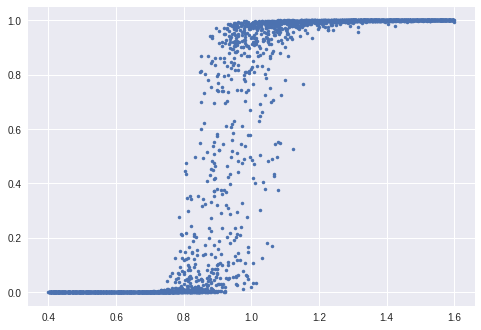

In [0]:
X_ticks = np.zeros(len(Y_pred))

for i in range(len(X_ticks)):
    X_ticks[i] = float(filesTest[i].split('/')[-1].split('_')[1][1:-1])
    

plt.plot(X_ticks, Y_pred[:, 1], '.', )

# Need to match file name with x axis

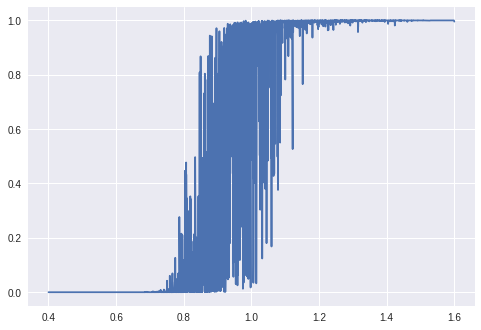

In [0]:
from operator import itemgetter

x = np.stack((X_ticks, Y_pred[:, 1])).T
y = np.asarray(sorted(x, key=lambda x: x[0]))
# plt.plot(x[:, 0], x[:, 1])
plt.plot(y[:, 0], y[:, 1])

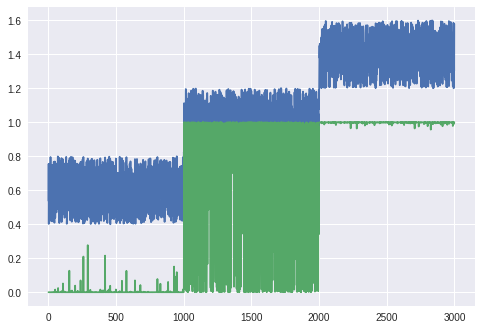

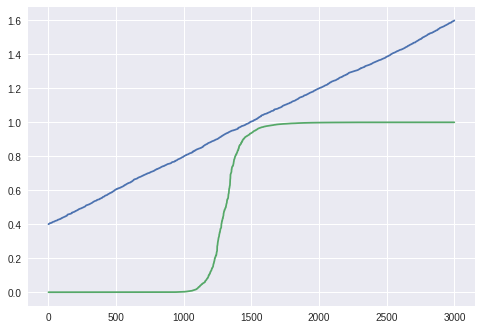

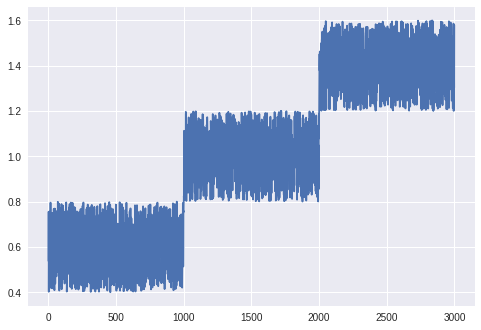

In [0]:
plt.plot(X_ticks)